# Project Info: 

For my project, I would like to utilize the Human Mortality database (https://www.mortality.org/) and the .csv file they provide detailing the weekly death counts for 38 different countries. The data is in a 16.2MB .csv file and is 101430 rows by 19 columns.

I was hoping to apply this data to the events that unfolded with the pandemic last year, cross-referencing different government's actions and efforts reported in World News organizations towards COVID with the weekly mortality of each respective country, assessing how well each country tried to curb the mortality of their citizens from COVID-19.

I hypothesize based solely on current death counts regarding COVID-19 that the United States will have faired the worst comparatively to countries selected in Europe and countries who are water-surrounded.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit
import sympy as sym
from sympy import *

dataFile = pd.read_csv('https://www.mortality.org/Public/STMF/Outputs/stmf.csv', skiprows = 2) #save read-in csv into "df" variable


In [2]:
dataFile

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,AUS2,2015,1,m,5.800872,202.199128,206.0,382.0,393.0,1189.0,0.000130,0.001337,0.010821,0.040008,0.118851,0.005225,1,0,0
1,AUS2,2015,1,f,6.758007,145.241993,161.0,299.0,670.0,1282.0,0.000160,0.000955,0.008226,0.026646,0.117591,0.005558,1,0,0
2,AUS2,2015,1,b,12.558879,347.441121,367.0,681.0,1063.0,2471.0,0.000145,0.001146,0.009506,0.032789,0.118053,0.005393,1,0,0
3,AUS2,2015,2,m,3.205745,155.794255,195.0,337.0,401.0,1092.0,0.000072,0.001030,0.010243,0.035295,0.121270,0.004799,1,0,0
4,AUS2,2015,2,f,5.181139,137.818861,143.0,295.0,654.0,1235.0,0.000123,0.000907,0.007307,0.026289,0.114782,0.005354,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101692,USA,2021,5,f,201.000000,6104.000000,5998.0,8006.0,12129.0,32438.0,0.000359,0.002986,0.017440,0.043371,0.145587,0.010086,0,0,1
101693,USA,2021,5,b,409.000000,16592.000000,14782.0,17454.0,20480.0,69717.0,0.000357,0.004061,0.022933,0.052963,0.156572,0.011002,0,0,1
101694,USA,2021,6,m,227.000000,9836.000000,7882.0,8445.0,7446.0,33836.0,0.000388,0.004817,0.026216,0.058259,0.156785,0.010842,0,0,1
101695,USA,2021,6,f,170.000000,5690.000000,5370.0,7533.0,10851.0,29614.0,0.000303,0.002784,0.015614,0.040809,0.130247,0.009208,0,0,1


# First Look at the Data

Country Codes are all listed in the same column, so I need to be able to query appropriately for each country/time interval.

Years all in same column and the Week column corresponds to the year until it hits 52 or 53 (depending on the year) then rolls over to the next year; I need to take this into account when looking at media outlets.

Let's look at the data types for each column.

In [3]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101697 entries, 0 to 101696
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  101697 non-null  object 
 1   Year         101697 non-null  int64  
 2   Week         101697 non-null  int64  
 3   Sex          101697 non-null  object 
 4   D0_14        101697 non-null  float64
 5   D15_64       101697 non-null  float64
 6   D65_74       101697 non-null  float64
 7   D75_84       101697 non-null  float64
 8   D85p         101697 non-null  float64
 9   DTotal       101697 non-null  float64
 10  R0_14        101697 non-null  float64
 11  R15_64       101697 non-null  float64
 12  R65_74       101697 non-null  float64
 13  R75_84       101697 non-null  float64
 14  R85p         101697 non-null  float64
 15  RTotal       101697 non-null  float64
 16  Split        101697 non-null  int64  
 17  SplitSex     101697 non-null  int64  
 18  Forecast     101697 non-

# Looking at the Data Types

It seems to be that there is data for each column in the raw csv, good!

There ara a couple object types however, so I need to convert those to strings in order to be read correctly in queries.

Also, the sex column clutters a lot of the data, so I'll be using the 'b' rows only which denotes the total number of deaths for both sexes for each week.

I won't be using the R values either as well as the Split/SplitSex/Forecast columns, so I'll be dropping all those.



In [4]:
df = dataFile.iloc[:, : 10] #Drop r values

df = df[df.Sex != 'm']  #drop male/female values
df = df[df.Sex != 'f']
df = df.drop(columns = 'Sex') #then drop sex column
convert_dict = {'CountryCode': str,
                'Year': str,
                'D0_14': int,
                'D15_64': int,
                'D65_74': int,
                'D75_84': int,
                'D85p': int,
                'DTotal': int}

df = df.astype(convert_dict) #convert columns to the data types in dictionary
df

,CountryCode,Year,Week,D0_14,D15_64,D65_74,D75_84,D85p,DTotal
2,AUS2,2015,1,12,347,367,681,1063,2471
5,AUS2,2015,2,8,293,338,632,1055,2327
8,AUS2,2015,3,11,311,404,645,1002,2374
11,AUS2,2015,4,7,288,354,626,1002,2278
14,AUS2,2015,5,10,303,355,618,1064,2351
...,...,...,...,...,...,...,...,...,...
101684,USA,2021,2,443,18862,16959,20735,24637,81636
101687,USA,2021,3,446,17929,16205,19721,23203,77504
101690,USA,2021,4,461,17247,15263,18405,21743,73119
101693,USA,2021,5,409,16592,14782,17454,20480,69717


# Analysis of the Countries: USA

First I will only be querying for the most recent years where the world was affected by COVID, so 2019-2021. Then I'll break this up further to focus on 2019 vs. 2020 and 2021, since there is limited data to analyze 2021 standing alone.

I'll set the index for each dataframe to the Week, for the whole dataframe containing all the years I'll multi-index for Year and Week, then drop the country codes in each for tidiness, we know we are only working with USA data now.

In [5]:
dfUSA = df[
    (df['CountryCode'] == 'USA') #query for deaths in 2019-2021
    & (df["Year"].isin(['2019', '2020', '2021']))
]

dfUSA2019 = df[
    (df['CountryCode'] == 'USA') #query for deaths in 2019
    & (df["Year"] == '2019')
]

dfUSA2020 = df[
    (df['CountryCode'] == 'USA') #query for deaths in 2020-2021
    & (df["Year"].isin(['2020']))
]

dfUSA = dfUSA.set_index(['Year','Week'])
dfUSA2019 = dfUSA2019.set_index('Week')
dfUSA2020 = dfUSA2020.set_index('Week')

dfUSA = dfUSA.drop(columns = 'CountryCode')
dfUSA2019 = dfUSA2019.drop(columns = 'CountryCode')
dfUSA2020 = dfUSA2020.drop(columns = 'CountryCode')

dfUSA

D0_14  D15_64  D65_74  D75_84   D85p  DTotal
Year Week                                              
2019 1       583   14485   11231   13947  18214   58461
     2       564   14197   11370   14203  18171   58506
     3       551   13856   11316   14124  18525   58373
     4       540   13978   11216   14184  18112   58031
     5       555   14055   11202   14199  18264   58276
...          ...     ...     ...     ...    ...     ...
2021 2       443   18862   16959   20735  24637   81636
     3       446   17929   16205   19721  23203   77504
     4       461   17247   15263   18405  21743   73119
     5       409   16592   14782   17454  20480   69717
     6       397   15526   13252   15978  18297   63450

[111 rows x 6 columns]

# Graphing a Line Plot

For this plot I'll be graphing both the 2019 and 2020-21 data together in order to compare/contrast between the two. I've added ticks for each week along the x-axis to pin-point exactly which week things started to change in 2020.

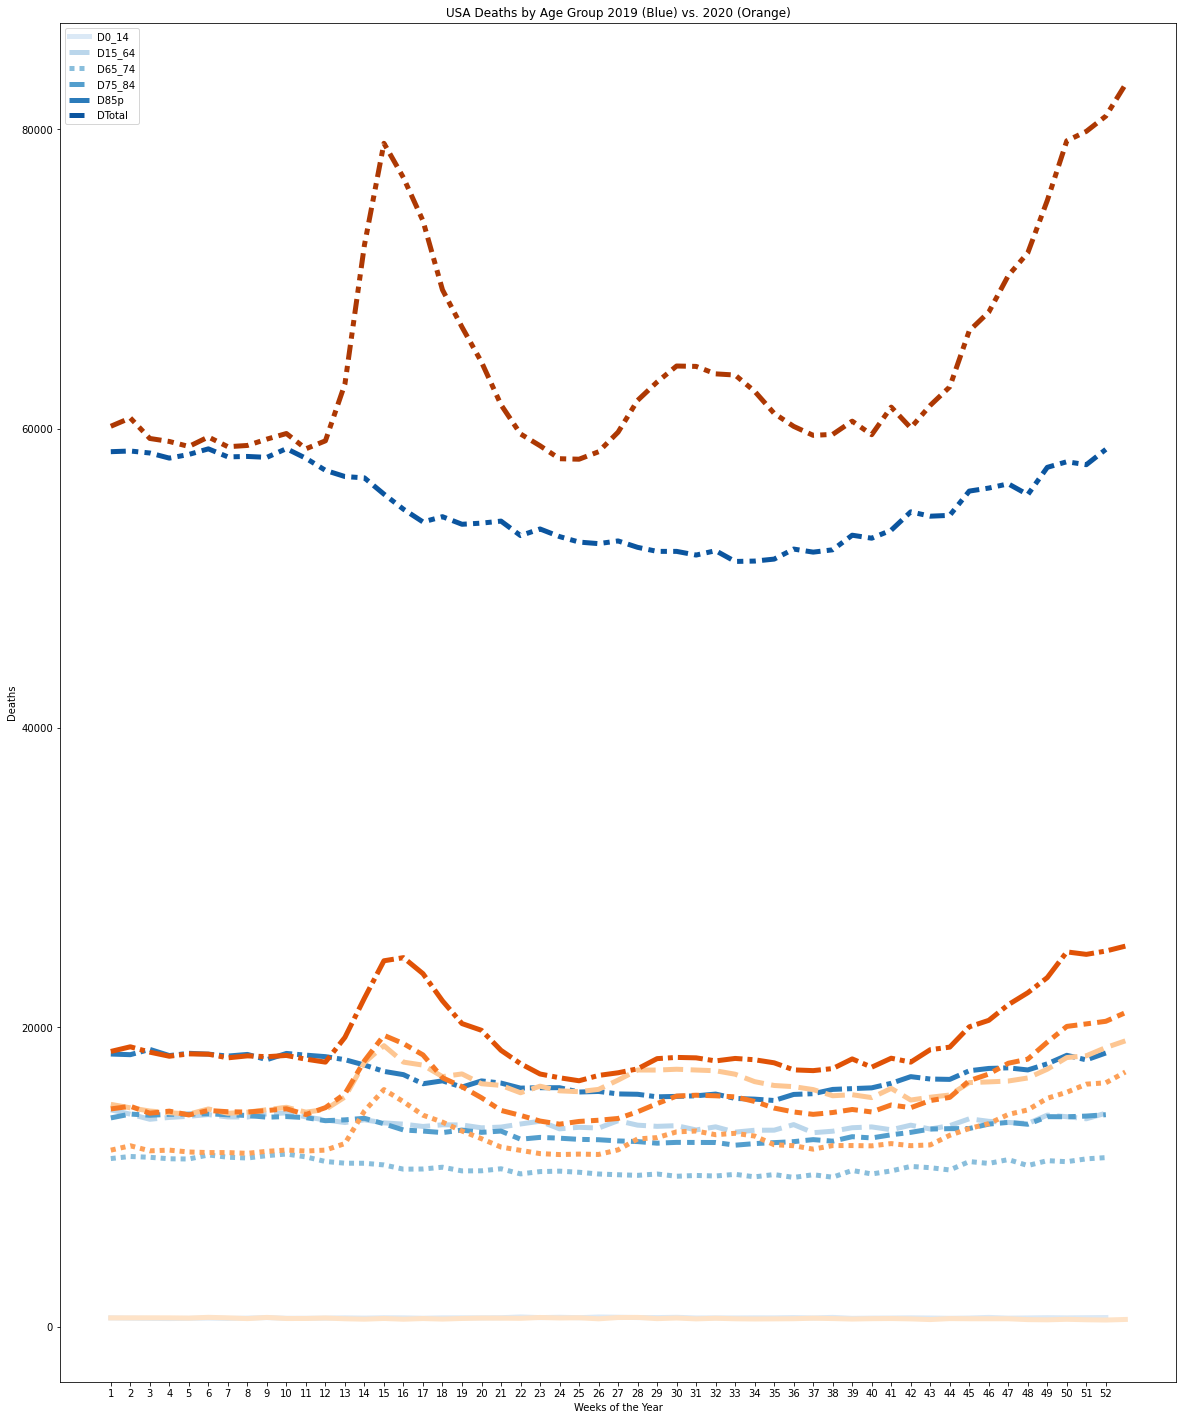

In [6]:
plt.figure(figsize=(20,25)) #make the graph bigger

g = sns.lineplot(data=dfUSA2019, palette = 'Blues', label = '2019', linewidth=5)
g = sns.lineplot(data=dfUSA2020, palette = 'Oranges', label = '2020', linewidth=5)
g.legend(['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal'])

g.set_xticks(range(1, 53))


g.set(xlabel= 'Weeks of the Year', ylabel = 'Deaths', title= 'USA Deaths by Age Group 2019 (Blue) vs. 2020 (Orange)')

plt.show()

# Analysis of Graph

Total Deaths is obviously hanging far above all the other data, and we can see the deaths really started to take off in 2020 around the 12th week, the week of 3/16-3/22. Deaths peaked weekly at the 15th week after an rapid increase, the week of 4/6-4/12.

Using this website to chart the timeline of the US's response to COVID-19: https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020

It's interesting to see that on March 6th 21 of 46 tested passengers on a California Cruise ship tested positive AT THE TIME, however there were 3500 on the ship, which leads one to believe that the majority of these people were carriers and were able to spread the virus nationally when returning home. This, in tandem with the travel bans not being completely in place around this time, can be attributed to the fast spreading of the virus and, as seen in the line plot, the spike in deaths around that time. 

The spike appears to fall back to the level it was at pre-pandemic around week 24, the week of 6/8-6/14. From records shown from multiple state governors, they were planning to reopen more of the states around this time, probably for 4th of July celebrations, but as one can see from the graph, deaths were beginning to rise again around the end of June a couple weeks later around week 30. This caused most states to cancel their opening plans and to continue to enforce restrictions. 

# Analysis of the Countries: Italy

In [7]:
dfITA = df[
    (df['CountryCode'] == 'ITA') #query for deaths in 2019-2021
    & (df["Year"].isin(['2019', '2020', '2021']))
]

dfITA2019 = df[
    (df['CountryCode'] == 'ITA') #query for deaths in 2019
    & (df["Year"] == '2019')
]

dfITA2020 = df[
    (df['CountryCode'] == 'ITA') #query for deaths in 2020-2021
    & (df["Year"].isin(['2020']))
]

dfITA = dfITA.set_index(['Year','Week'])
dfITA2019 = dfITA2019.set_index('Week')
dfITA2020 = dfITA2020.set_index('Week')

dfITA = dfITA.drop(columns = 'CountryCode')
dfITA2019 = dfITA2019.drop(columns = 'CountryCode')
dfITA2020 = dfITA2020.drop(columns = 'CountryCode')

dfITA

D0_14  D15_64  D65_74  D75_84  D85p  DTotal
Year Week                                             
2019 1        34    1402    1867    4090  6775   14168
     2        35    1407    1886    4317  7218   14863
     3        31    1456    1955    4410  7473   15325
     4        28    1526    1942    4458  7406   15360
     5        32    1521    1971    4593  7690   15807
...          ...     ...     ...     ...   ...     ...
2020 53       20    1517    2167    4595  7627   15926
2021 1        34    1462    2140    4626  7576   15838
     2        26    1451    2117    4655  7596   15845
     3        18    1526    2117    4577  7766   16004
     4        27    1434    1980    4352  7510   15303

[109 rows x 6 columns]

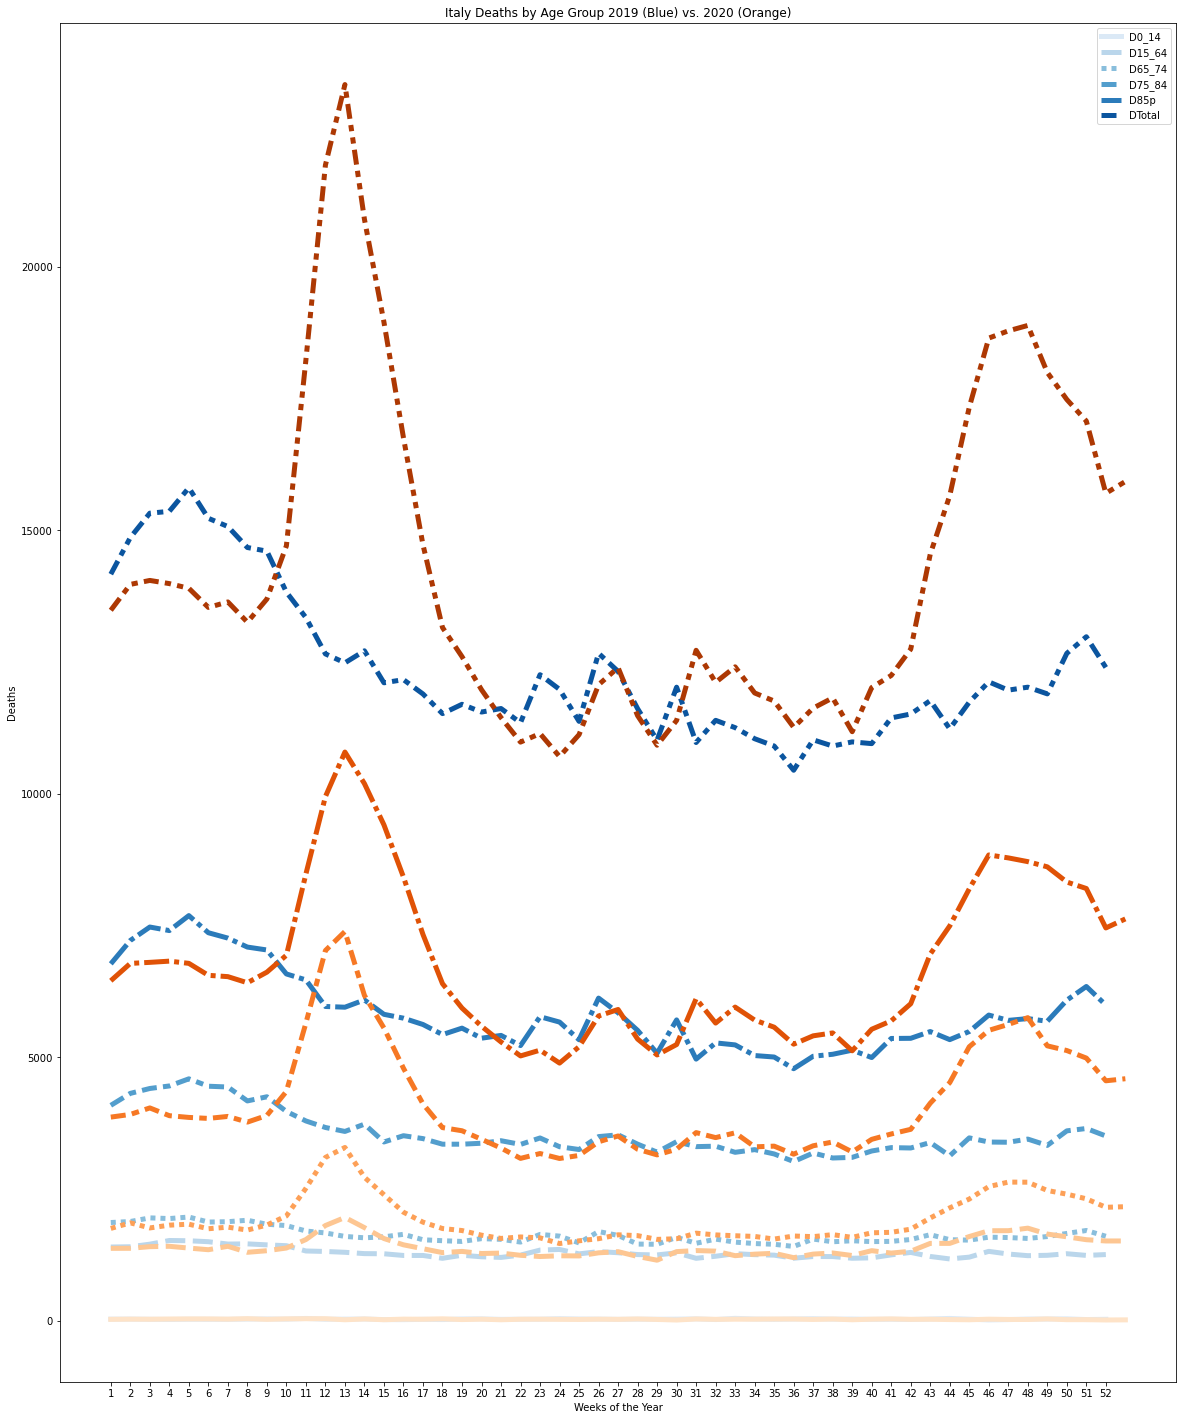

In [8]:
plt.figure(figsize=(20,25)) #make the graph bigger

g = sns.lineplot(data=dfITA2019, palette = 'Blues', label = '2019', linewidth=5)
g = sns.lineplot(data=dfITA2020, palette = 'Oranges', label = '2020', linewidth=5)
g.legend(['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal'])

g.set_xticks(range(1, 53))


g.set(xlabel= 'Weeks of the Year', ylabel = 'Deaths', title= 'Italy Deaths by Age Group 2019 (Blue) vs. 2020 (Orange)')

plt.show()

# Analysis of Italy

With Italy we can see their COVID response was a little bit different. Whereas in the US there was barely any spike in 2019 near the end of the year, you can see clearly that deaths were already mounting in Italy before 2020 even started. There peak was about the same as the US, around week 12 (3/16-3/22) but they never had a huge resurgence in deaths after that, unlike the US in June 2020. This is due to the Italian government making sure that, even today, all restrictions are still in place, regional borders, etc. are still closed. 

Information found here: http://www.xinhuanet.com/english/2021-02/26/c_139767889.htm

# Analysis of Countries: New Zealand

In [9]:
dfNZL = df[
    (df['CountryCode'] == 'NZL_NP') #query for deaths in 2019-2021
    & (df["Year"].isin(['2019', '2020', '2021']))
]

dfNZL2019 = df[
    (df['CountryCode'] == 'NZL_NP') #query for deaths in 2019
    & (df["Year"] == '2019')
]

dfNZL2020 = df[
    (df['CountryCode'] == 'NZL_NP') #query for deaths in 2020-2021
    & (df["Year"].isin(['2020']))
]

dfNZL = dfNZL.set_index(['Year','Week'])
dfNZL2019 = dfNZL2019.set_index('Week')
dfNZL2020 = dfNZL2020.set_index('Week')

dfNZL = dfNZL.drop(columns = 'CountryCode')
dfNZL2019 = dfNZL2019.drop(columns = 'CountryCode')
dfNZL2020 = dfNZL2020.drop(columns = 'CountryCode')

dfNZL

D0_14  D15_64  D65_74  D75_84  D85p  DTotal
Year Week                                             
2019 1         8     134     100     151   214     609
     2         7     124      92     152   227     604
     3         8     133     100     157   225     625
     4         7     108      99     154   218     589
     5         8     122      97     136   178     544
...          ...     ...     ...     ...   ...     ...
2021 6         6     118     111     177   230     645
     7         5     109      94     159   216     586
     8         6     127      93     158   213     600
     9         6     127      97     166   228     627
     10        6     116      95     159   214     593

[115 rows x 6 columns]

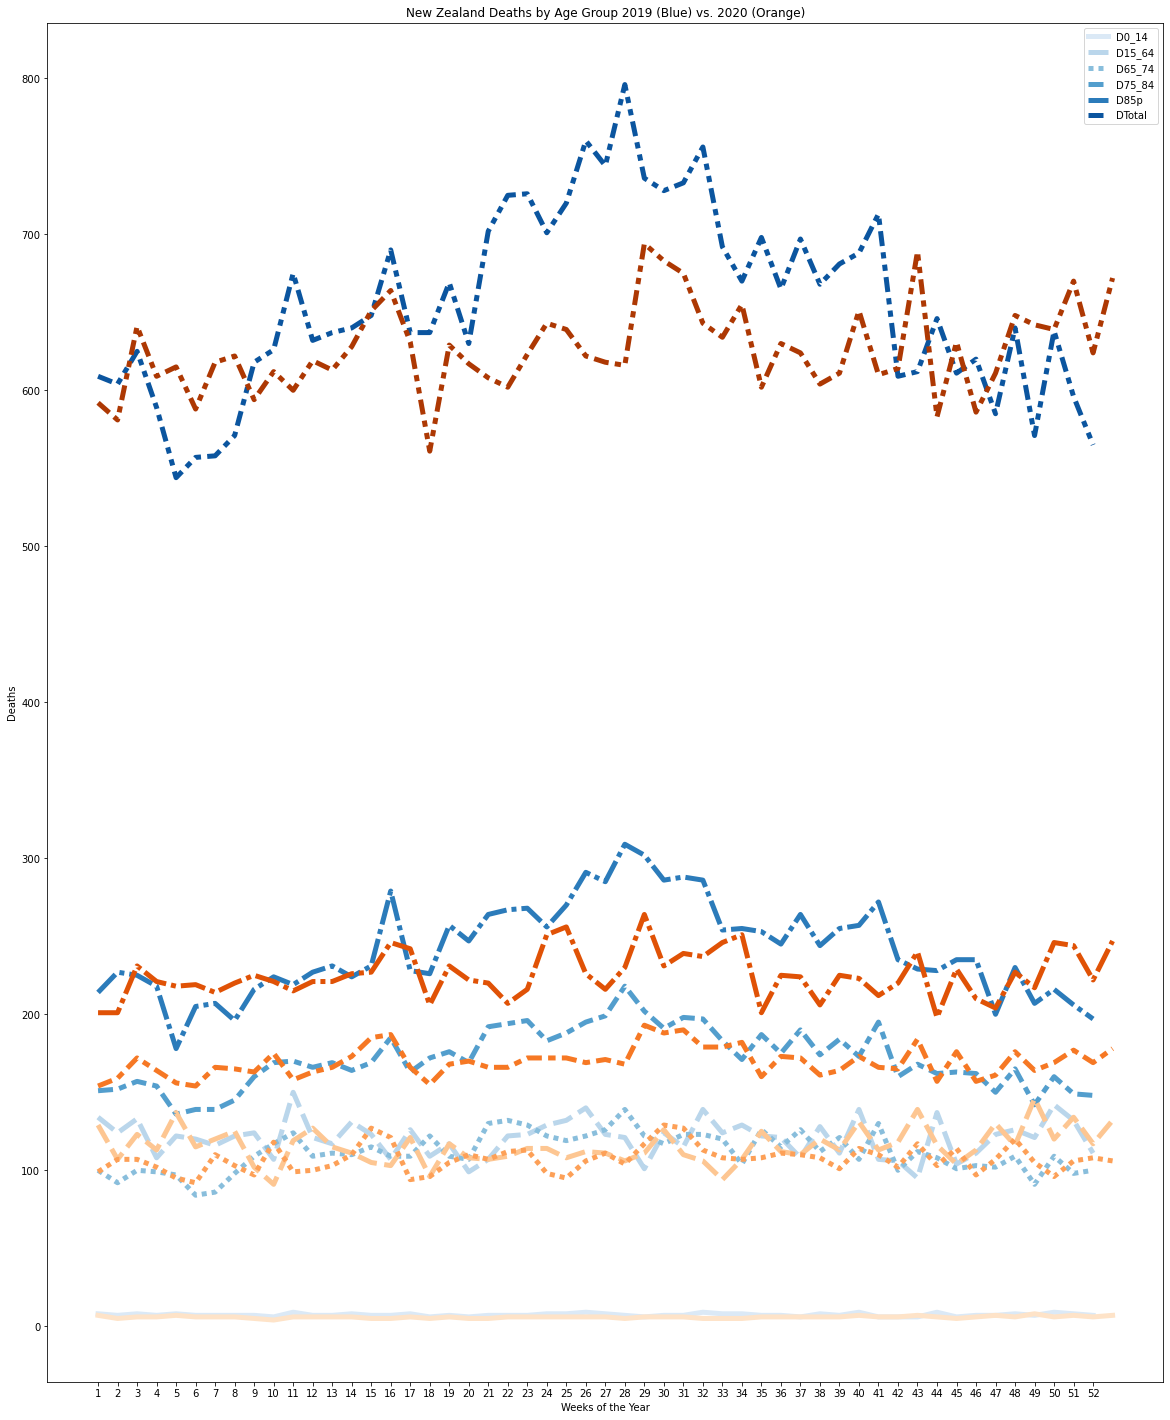

In [10]:
plt.figure(figsize=(20,25)) #make the graph bigger

g = sns.lineplot(data=dfNZL2019, palette = 'Blues', label = '2019', linewidth=5)
g = sns.lineplot(data=dfNZL2020, palette = 'Oranges', label = '2020', linewidth=5)
g.legend(['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal'])

g.set_xticks(range(1, 53))


g.set(xlabel= 'Weeks of the Year', ylabel = 'Deaths', title= 'New Zealand Deaths by Age Group 2019 (Blue) vs. 2020 (Orange)')

plt.show()

# Analysis of New Zealand

New Zealand's data is extremely interesting. Known to be the country who was able to eradicate COVID-19 completely by locking down borders for their already small population, one can see that death rates were up in 2020 compared to 2019, but there was no decernable "peak" of deaths which can be seen in the US and Italy.

Again we see no descernable change from 2019 to 2020 when it came to deaths in certain age brackets, but we do have an interesting peak in deaths around the summer time, from June to about July.

I can account for this due to the fact that New Zealand is on the opposite hemisphere from North America, meaning that their summers and winters are the inverse of ours. So it would make sense that more would die from a miriad of different reasons more likely in the winter than in the summer, and quarantining during it would certainly exacerbate the problem.

# Who Did Best?

The question I wanted to answer by analyzing this data was which country performed best when responding to COVID-19? By looking at the following line graph, which I have corrected values for based on population size, we can see the total number of deaths each week charted through 2020 for the US, Italy, and New Zealand adjusted for population size. 

[Text(0.5, 0, 'Weeks of the Year'),
 Text(0, 0.5, 'Deaths/Population Size'),
 Text(0.5, 1.0, 'Total Deaths 2020-21, USA vs Italy vs New Zealand')]

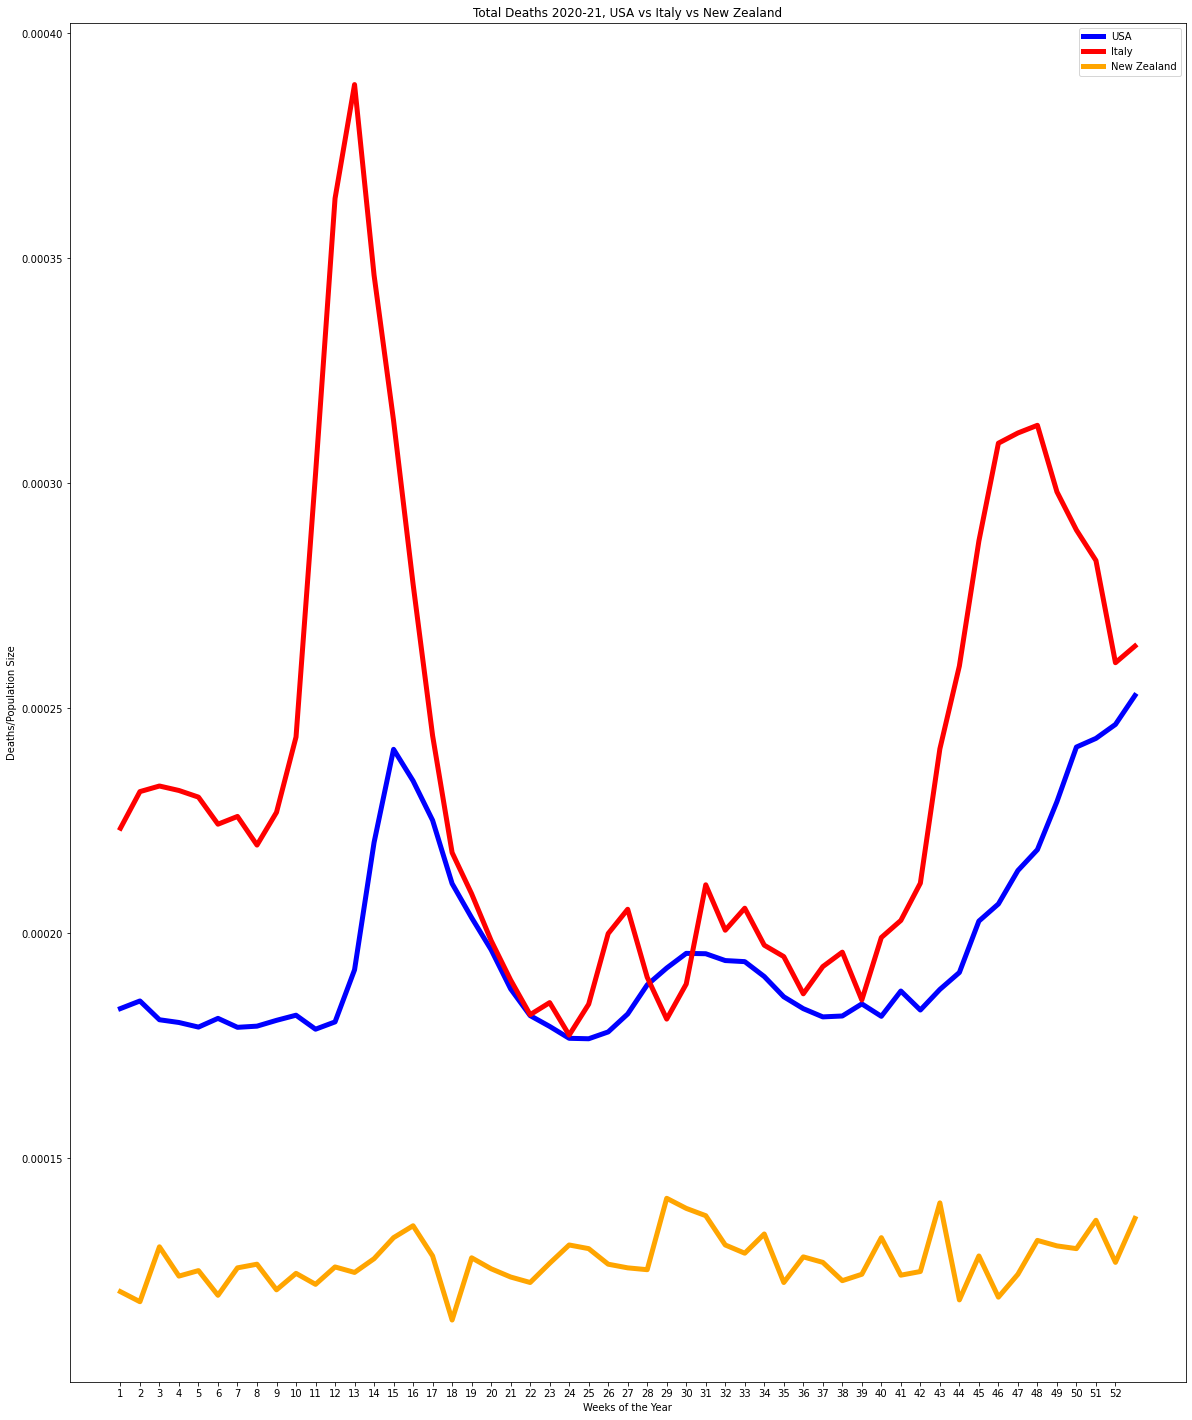

In [11]:
dfUSA = df[
    (df['CountryCode'] == 'USA') #query for deaths in 2020
    & (df["Year"] == '2020')
]

dfUSA = dfUSA.drop(columns = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p']) #drop everything but total deaths

dfUSA = dfUSA.set_index('Week') #set week as index





dfITA = df[
    (df['CountryCode'] == 'ITA') #query for deaths in 2020
    & (df["Year"] == '2020')
]

dfITA = dfITA.drop(columns = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p']) #drop everything but total deaths

dfITA = dfITA.set_index('Week') #set week as index





dfNZL = df[
    (df['CountryCode'] == 'NZL_NP') #query for deaths in 2020
    & (df["Year"] == '2020')
]

dfNZL = dfNZL.drop(columns = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p']) #drop everything but total deaths

dfNZL = dfNZL.set_index('Week') #set week as index

popUSA = 328200000 #constant population sizes for calculation
popITA = 60360000
popNZL = 4917000

def adjustPop(value, pop_size): #function to adjust population
    return value / pop_size
    
dfUSA = dfUSA.apply(lambda x: adjustPop(x['DTotal'], popUSA), axis=1) #apply function to total deaths column for each frame
dfITA = dfITA.apply(lambda x: adjustPop(x['DTotal'], popITA), axis=1)
dfNZL = dfNZL.apply(lambda x: adjustPop(x['DTotal'], popNZL), axis=1)

plt.figure(figsize=(20,25)) #make the graph bigger

g = sns.lineplot(data=dfUSA, color = 'blue', label='USA', linewidth=5)
g = sns.lineplot(data=dfITA, color = 'red', label='Italy', linewidth=5)
g = sns.lineplot(data=dfNZL, color = 'orange', label='New Zealand', linewidth=5)

g.set_xticks(range(1, 53))
g.set(xlabel= 'Weeks of the Year', ylabel = 'Deaths/Population Size', title= 'Total Deaths 2020-21, USA vs Italy vs New Zealand')

# Analysis

Going into this analysis, I would have assumed the US would have had one of the worst responses to COVID, however now looking at this graph I can see that is not exactly the case. With the function I created I was able to adjust for the respective population of each country, that way we can see how many died in terms of the overall population of each country.

Italy, at least from this graph and data, was absolutely decimated at the peak of the pandemic last March. Nearly .04% of their population was dying every week, and while that doesn't seem like a lot, for a stretch of 3 weeks, that adds up to nearly 75,000 dead.

The US faired much better comparatively, with their peak only reaching about .025% of the population weekly. However, because of the US's large population, the gross amount of deaths in three weeks at that rate would be about 82,000, which is technically more than Italy. Therefore, using numbers like this comparing to other countries could cause bias to arise and misleaed readers about the actual amount of people dying in a given time interval.

New Zealand seems to be acting more as a control in this graph, their deaths over their population certainly fluctuated throughout the year, but agan, there was no discernable moment where one could say the pandemic really affected their population.

Final thoughts on the graph: Near the end of 2020 both Italy and the US's deaths over population is rising once again, most likely having to do with the traveling that was going on during the holiday season and restrictions having been let up in the US more and more as 2020 progressed. However, Italy's restrictions are still firmly in place, I would like to know more about why their death counts are again rising, perhaps they are too lifting restrictions? Or is there another external force at play that is casuing their deaths to rise again?

In conclusion, my initial thoughts on how the US faired during the pandemic were skewed by the overall size of the US population in general. When adjusting for that and looking at other developed countries, it truly suprised me to see that Italy faired so poorly. 

Because of this suprising revelation, I lastly want to plot a linear regression for each of these three coubntries to get a better understanding of how each did taking into account the entirety of 2020.

# Least Squares Regression of Total Deaths for 2020 for USA, ITA, and NZL



[Text(0.5, 0, 'Weeks of the Year'),
 Text(0, 0.5, 'Total Deaths per Week over Population'),
 Text(0.5, 1.0, 'Death Total Per Week Over Population vs. Least Squares Regression for USA (Blue), Italy (Orange), and New Zealand (Red)')]

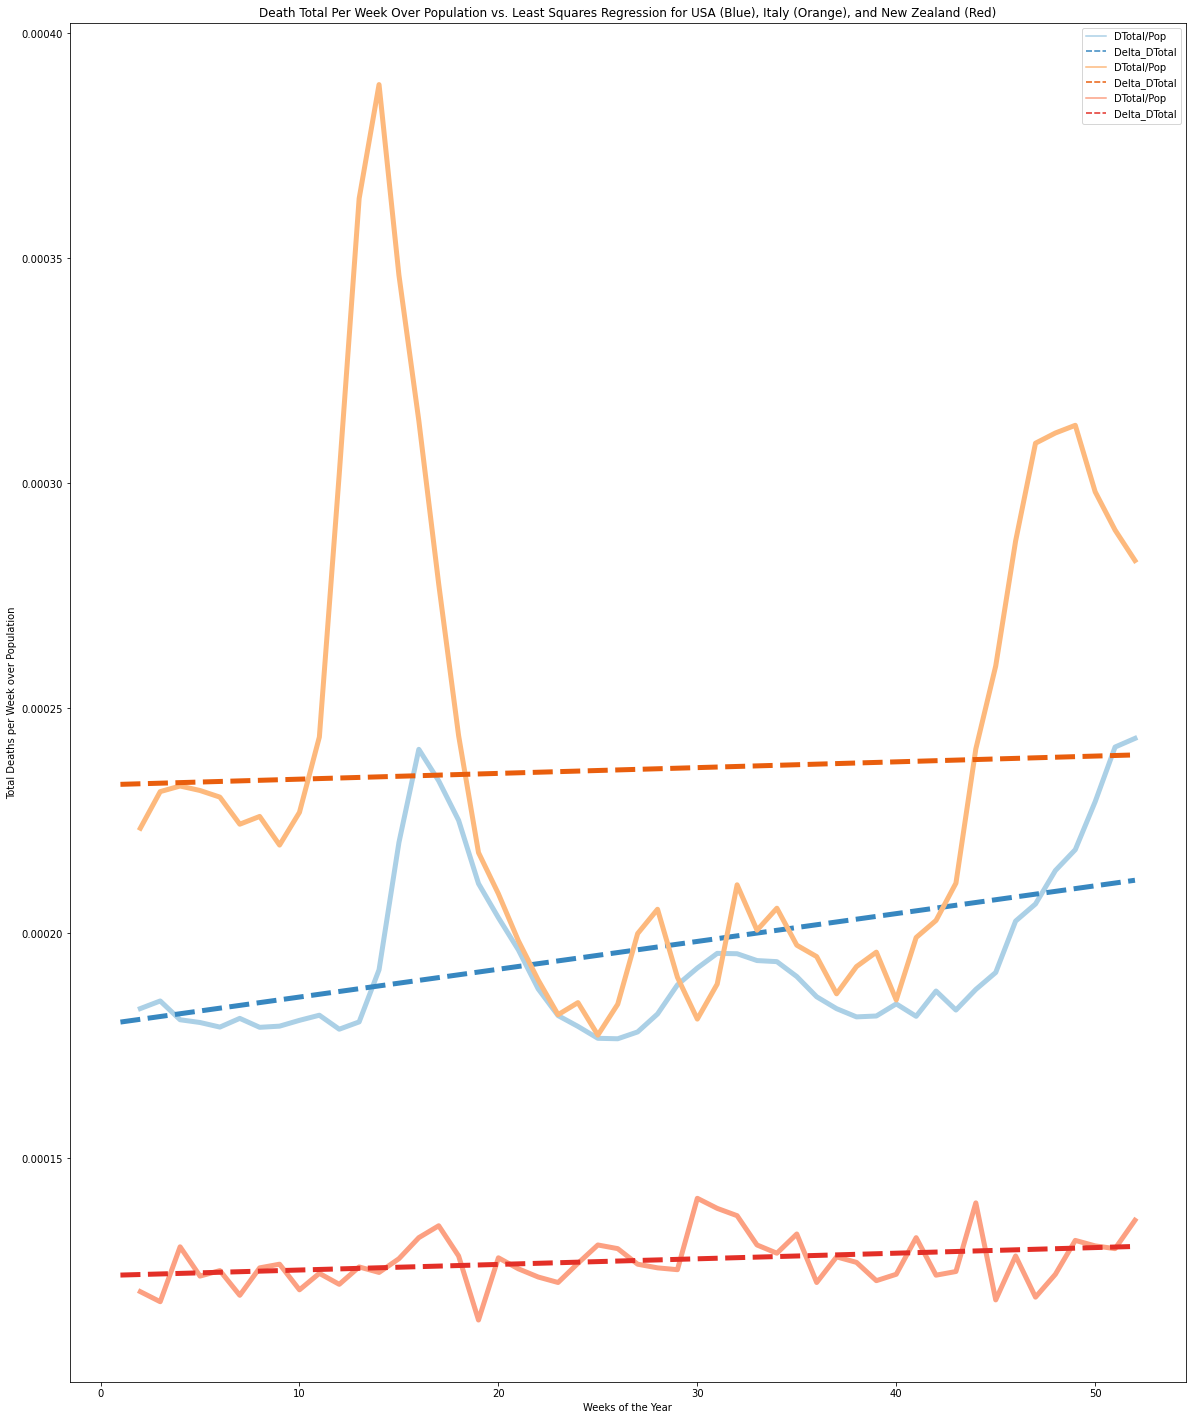

In [12]:


g1 = np.polyfit(dfUSA.index, dfUSA.values, 1) #use polyfit to get data points
fUSA = np.poly1d(g1) #creates equation from data points

deltaUSA = []
weeks = list(int(i) for i in range(1, len(dfUSA)))
Sweeks = pd.Series(weeks)

for i in range(0, len(dfUSA)):
    deltaUSA.append(fUSA(dfUSA.index[i]))   #creating a new dataframe to hold regression and population-adjusted data
    
seriesUSA = pd.Series(deltaUSA)

dfDeltaUSA = pd.concat([Sweeks, dfUSA, seriesUSA], axis=1)
dfDeltaUSA.columns = ['Week', 'DTotal/Pop', 'Delta_DTotal']
dfDeltaUSA = dfDeltaUSA.set_index('Week')

#same for ITA
g2 = np.polyfit(dfITA.index, dfITA.values, 1)
fITA = np.poly1d(g2)

deltaITA = []
weeks = list(int(i) for i in range(1, len(dfITA)))
Sweeks = pd.Series(weeks)

for i in range(0, len(dfITA)):
    deltaITA.append(fITA(dfITA.index[i]))
    
seriesITA = pd.Series(deltaITA)

dfDeltaITA = pd.concat([Sweeks, dfITA, seriesITA], axis=1)
dfDeltaITA.columns = ['Week', 'DTotal/Pop', 'Delta_DTotal']
dfDeltaITA = dfDeltaITA.set_index('Week')

#same for NZL

g3 = np.polyfit(dfNZL.index, dfNZL.values, 1)
fNZL = np.poly1d(g3)

deltaNZL = []
weeks = list(int(i) for i in range(1, len(dfNZL)))
Sweeks = pd.Series(weeks)

for i in range(0, len(dfNZL)):
    deltaNZL.append(fNZL(dfNZL.index[i]))
    
seriesNZL = pd.Series(deltaNZL)

dfDeltaNZL = pd.concat([Sweeks, dfNZL, seriesNZL], axis=1)
dfDeltaNZL.columns = ['Week', 'DTotal/Pop', 'Delta_DTotal']
dfDeltaNZL = dfDeltaNZL.set_index('Week')


plt.figure(figsize=(20,25))
g = sns.lineplot(data=dfDeltaUSA, palette = 'Blues', linewidth=5)
g = sns.lineplot(data=dfDeltaITA, palette = 'Oranges', linewidth=5) #plot all three on same graph
g = sns.lineplot(data=dfDeltaNZL, palette = 'Reds', linewidth=5)

g.set(xlabel= 'Weeks of the Year', ylabel = 'Total Deaths per Week over Population', title= 'Death Total Per Week Over Population vs. Least Squares Regression for USA (Blue), Italy (Orange), and New Zealand (Red)')

In [13]:
print('Equation for USA line: ', fUSA)
print('Equation for ITA line: ', fITA)
print('Equation for NZL line: ', fNZL)

Equation for USA line:   
6.18e-07 x + 0.0001797
Equation for ITA line:   
1.282e-07 x + 0.000233
Equation for NZL line:   
1.247e-07 x + 0.000124


# Analysis of Regression and Conclusion

The regression plot above is very telling that the ideas I had from the last graph may not be entirely correct. Italy's regression line sits well above the other two which I had anticipated from the last graph, showing that Italy compared to their population had faired the worst during the pandemic.

However, once I obtained the actual equations from the data points that created these lines I was able to see that while Italy througout 2020 faired the worst, they were able to curtail the deaths as the year progressed. This can be seen by the slope of the regression line; Italy's slope is remarkably similar to New Zealand's, the country I anticipated and is evidently who faired the best. Their slopes are within .035e-7 of each other, which is not very much as compared to the USA's slope, which really suprised me as I had anticipated to be wrong with my assumptions after the last graph.

The USA, while COVID-19 did not dent its very large population comparative to the other countries, had an very large slope compared to Italy and New Zealand, being nearly 5 times that of Italy's. This shows that while the USA's population was not as heavily affected the way Italy's was in March 2020, throughout the year the USA was fairing far worse than the others, deaths were not stagnating but climbing as 2021 approached. 

Because of this revelation due to this graph, I am torn on whether I can actually say which country faired the worst. It really entirely depends on what metrics I am looking at; if I focus in on the start of the pandemic I easily get Italy, but looking at the entirety of 2020 holistically I have to say the USA. Looking to the future, as we are still currently in the throws of the pandemic, because the regression line for the USA steadily approaches the one from Italy while Italy's remains fairly constant comparatively, I can say that when all is said and done the USA will have faired the worst, proving my hypothesis correct. 

If I am able to work with this data again I would like to be able to project the mortality of these countries with the data currently collected from 2021 and try to determine how each country will fair for the rest of this year. As the vaccines roll in I think it would be interesting as well to see how overall mortality for each country will be affected, obviously it will go down, but by how much and when?